# Main Predict: Passing Grades (Quality Education)

### Overview of Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import warnings
np.random.seed(999)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, matthews_corrcoef

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('student-mat.csv',delimiter=',')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df.shape

(395, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


### Feature Engineering

In [ ]:
# Calculate the mean of 'G1', 'G2', and 'G3'
mean_grade = df[['G1', 'G2', 'G3']].mean(axis=1)

# Create a new column based on the mean
df['result'] = mean_grade.apply(lambda x: 'pass' if x >= 10 else 'fail')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,result
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fail
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fail


In [ ]:
# Binary encoding for binary values

df_encode = {"sex": {"F":1,"M" :0}} #Female = 1 or Male = 1
df = df.replace(df_encode)

df_encode = {"school": {"GP":1,"MS" :0}} #'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira
df = df.replace(df_encode)

df_encode = {"address": {"U":1,"R" :0}} #Urban = 1 or Rural = 0
df = df.replace(df_encode)

df_encode = {"famsize": {"GT3":1,"LE3" :0}}
df = df.replace(df_encode)

df_encode = {"Pstatus": {"A":1,"T" :0}} #0 = T = living together or 1 = 'A' = apart)
df = df.replace(df_encode)

df_encode = {"schoolsup": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"famsup": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"paid": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"activities": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"nursery": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"higher": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"internet": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"romantic": {"no":0,"yes":1}}
df = df.replace(df_encode)

In [ ]:
# Define the categorical columns to be one-hot encoded
cat_cols = [ 'Mjob', 'Fjob', 'reason', 'guardian']

# Perform one-hot encoding on the categorical columns and concatenate with the original dataframe
df_encoded = pd.concat([df, pd.get_dummies(df[cat_cols])], axis=1)

# Drop the original categorical columns
df_encoded.drop(cat_cols, axis=1, inplace=True)

# View the encoded dataframe
df_encoded.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.883544,0.526582,16.696203,0.777215,0.711392,0.103797,2.749367,2.521519,1.448101,2.035443,...,0.549367,0.281013,0.073418,0.367089,0.275949,0.091139,0.265823,0.227848,0.691139,0.081013
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,...,0.498188,0.450064,0.261152,0.482622,0.447558,0.288172,0.442331,0.419976,0.462610,0.273201
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,16.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school             395 non-null    int64 
 1   sex                395 non-null    int64 
 2   age                395 non-null    int64 
 3   address            395 non-null    int64 
 4   famsize            395 non-null    int64 
 5   Pstatus            395 non-null    int64 
 6   Medu               395 non-null    int64 
 7   Fedu               395 non-null    int64 
 8   traveltime         395 non-null    int64 
 9   studytime          395 non-null    int64 
 10  failures           395 non-null    int64 
 11  schoolsup          395 non-null    int64 
 12  famsup             395 non-null    int64 
 13  paid               395 non-null    int64 
 14  activities         395 non-null    int64 
 15  nursery            395 non-null    int64 
 16  higher             395 non-null    int64 
 1

In [ ]:
data = df_encoded.drop(['G1', 'G2', 'G3', 'result'], axis = 1)  # Drop the 'G1', 'G2', 'G3', and 'result' columns and store the result in the variable 'data'
target = df_encoded['result']  # Store the 'result' column in the variable 'target'
target

0      fail
1      fail
2      fail
3      pass
4      fail
       ... 
390    fail
391    pass
392    fail
393    pass
394    fail
Name: result, Length: 395, dtype: object

In [ ]:
target = target.replace({'pass':1,'fail':0})
target.value_counts()

print(target.value_counts())

1    231
0    164
Name: result, dtype: int64


## Feature Scaling

In [ ]:
df_unscaled=data.values
scaled_df = preprocessing.MinMaxScaler().fit_transform(df_unscaled)

In [ ]:
pd.DataFrame(scaled_df, columns=data.columns).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1.0,1.0,0.428571,1.0,1.0,1.0,1.00,1.00,0.333333,0.333333,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.285714,1.0,1.0,0.0,0.25,0.25,0.000000,0.333333,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.000000,1.0,0.0,0.0,0.25,0.25,0.000000,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.000000,1.0,1.0,0.0,1.00,0.50,0.000000,0.666667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.142857,1.0,1.0,0.0,0.75,0.75,0.000000,0.333333,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Feature Selection And Ranking

Using 1-nearest neighbor classifier will be used to compare the performance of feature selection methods: F-Score and Random Forest Importance also using stratified 150-fold cross validation with 20 repetitions for assessment.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
cv_method = RepeatedStratifiedKFold(n_splits=3, n_repeats=10,random_state=69)

Full Selection

In [ ]:

from sklearn.model_selection import cross_val_score
cv_results_full = cross_val_score(estimator=clf,
                             X=scaled_df,
                             y=target,
                             cv=cv_method,
                             scoring='roc_auc')
cv_results_full.mean()

0.5294795720553296

Random Forest Importance

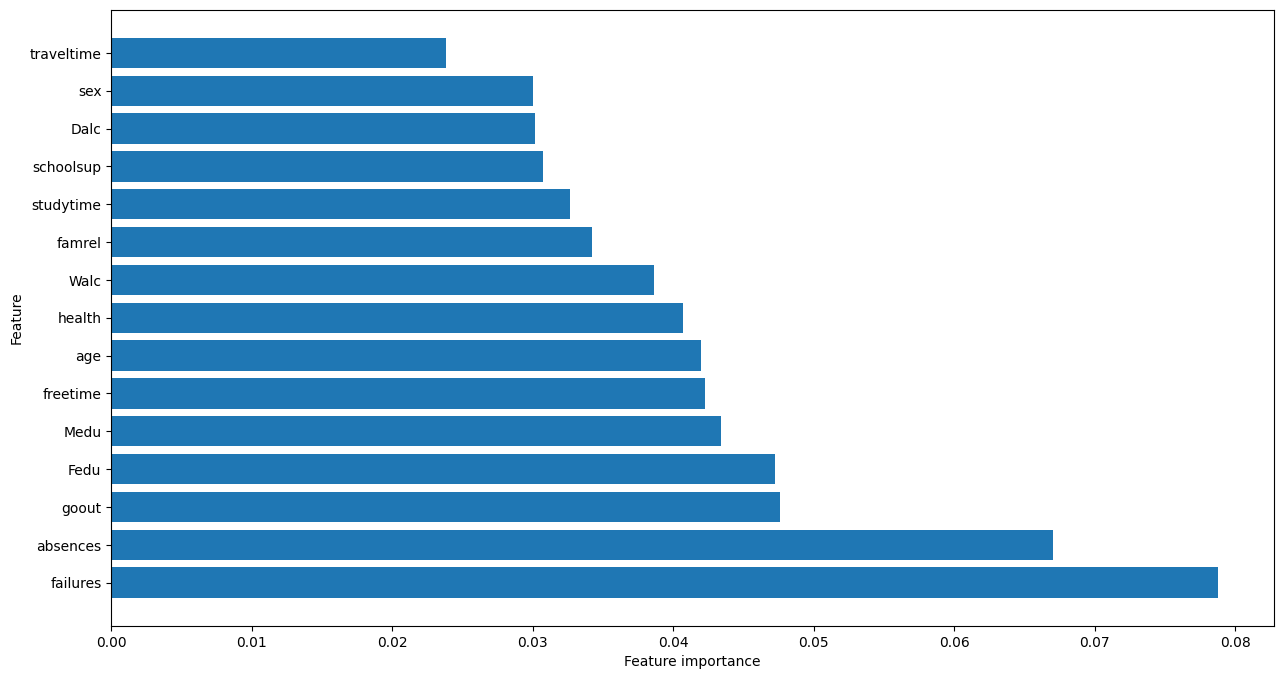

array([0.07880107, 0.06701981, 0.04763204, 0.04723271, 0.04340892,
       0.0422711 , 0.04198307, 0.04071965, 0.03861069, 0.03425296,
       0.03265872, 0.03072219, 0.03019589, 0.0300528 , 0.02386203])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=999)
model.fit(scaled_df, target)

# Get the feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Select the top 15 most important features
top_features = data.columns[sorted_indices[:15]]

fs_indices_rfi = np.argsort(model.feature_importances_)[::-1][:15]

# Plot the feature importances for the top 15 features
plt.figure(figsize=(15, 8))
plt.barh(range(15), importances[sorted_indices][:15], align='center')
plt.yticks(range(15), top_features)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

importances[sorted_indices][:15]


In [ ]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X= scaled_df[:, fs_indices_rfi],
                             y=target,
                             cv=cv_method,
                             scoring='roc_auc')
cv_results_rfi.mean()

0.6230258574197968

F Score

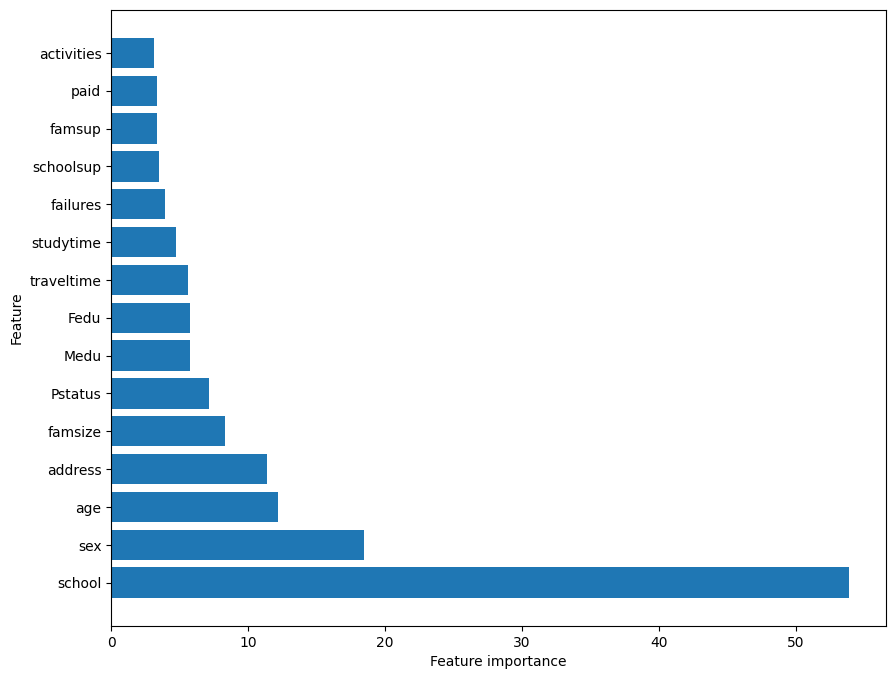

In [ ]:
from sklearn import feature_selection as fs
np.random.seed(999)
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=15)
fs_fit_fscore.fit_transform(scaled_df, target)
fs_indices_fscore = np.argsort(fs_fit_fscore.scores_)[::-1][0:15]
best_features_fscore = data.columns[fs_indices_fscore].values
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]

# Sort the feature importances and feature labels in descending order
sorted_indices = np.argsort(feature_importances_fscore)[::-1]
sorted_features = data.columns[sorted_indices]
sorted_importances = feature_importances_fscore[sorted_indices]

# Plot the feature importances in descending order
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices)), sorted_importances, align='center')
plt.yticks(range(len(sorted_indices)), sorted_features)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
print(best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

['failures' 'schoolsup' 'Medu' 'Fedu' 'goout' 'higher' 'age' 'sex'
 'internet' 'studytime' 'reason_reputation' 'Mjob_health' 'traveltime'
 'address' 'Walc']
[53.87857482 18.46248481 12.17973914 11.40816613  8.31282332  7.12932355
  5.76404007  5.72065689  5.58809819  4.7416653   3.96634162  3.48269075
  3.37495665  3.36569019  3.12970953]


In [ ]:
cv_results_fscore = cross_val_score(estimator=clf,
                             X= scaled_df[:, fs_indices_fscore],
                             y=target,
                             cv=cv_method,
                             scoring='roc_auc')
cv_results_fscore.mean()

0.6118944859853951

Performance Comparison Using Paired T-Tests

In [ ]:
from scipy import stats
print(stats.ttest_rel(cv_results_full, cv_results_fscore).pvalue.round(3))
print(stats.ttest_rel(cv_results_full, cv_results_rfi).pvalue.round(3))
print(stats.ttest_rel(cv_results_rfi, cv_results_fscore).pvalue.round(3))

0.0
0.0
0.156


Nilai p yang diperoleh dari uji-t masing-masing adalah 0,0, 0,0, dan 0,584 untuk ketiga perbandingan. Nilai p yang rendah (biasanya ≤ 0,05) menunjukkan bahwa hipotesis nol dapat ditolak, yang menunjukkan bahwa terdapat perbedaan yang signifikan antara sampel berpasangan.

Dalam kasus ini, Dua nilai p pertama (0,0 dan 0,0) menunjukkan bahwa terdapat perbedaan yang signifikan secara statistik antara rata-rata sampel yang bersangkutan. Nilai p ketiga (0,156) menunjukkan bahwa tidak ada perbedaan yang signifikan antara rata-rata sampel cv_results_rfi dan cv_results_fscore.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'failures'),
  Text(1, 0, 'schoolsup'),
  Text(2, 0, 'Medu'),
  Text(3, 0, 'Fedu'),
  Text(4, 0, 'goout'),
  Text(5, 0, 'higher'),
  Text(6, 0, 'age'),
  Text(7, 0, 'sex'),
  Text(8, 0, 'internet'),
  Text(9, 0, 'studytime'),
  Text(10, 0, 'reason_reputation'),
  Text(11, 0, 'Mjob_health'),
  Text(12, 0, 'traveltime'),
  Text(13, 0, 'address'),
  Text(14, 0, 'Walc')])

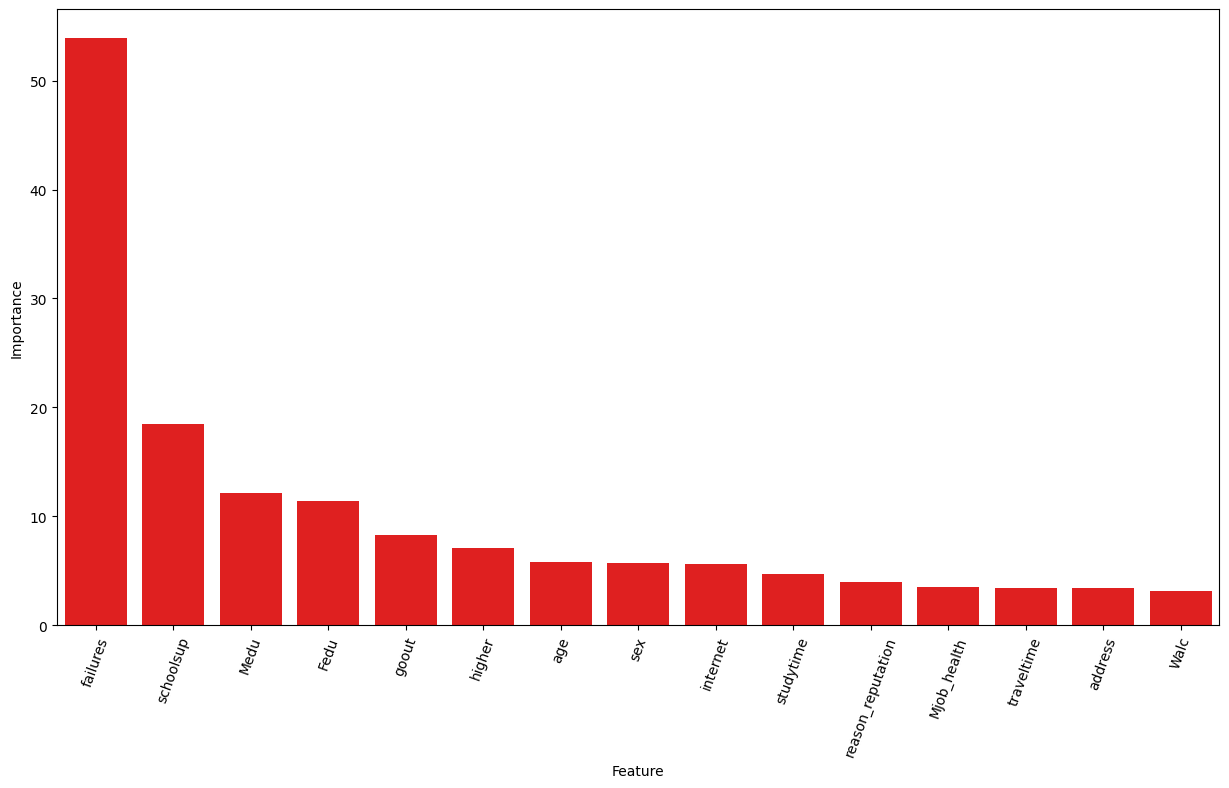

In [ ]:
feature_ranking = pd.DataFrame({'Feature': best_features_fscore,
                                'Importance': list(feature_importances_fscore)},
                               columns=['Feature', 'Importance'])
plt.figure(figsize=(15, 8))
import seaborn as sns
sns. barplot(x="Feature",y="Importance",
            color='red',data=feature_ranking)
plt.xticks(rotation=70)

## Train-Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_df,
                                                 target.values,
                                                 test_size=0.2,
                                                 random_state=999,
                                                 stratify=target.values)
print(X_train.shape)
print(X_test.shape)

(316, 43)
(79, 43)


In [ ]:
X_train_15 = pd.DataFrame(X_train, columns=data.columns)
X_train_15 = X_train_15[best_features_fscore].values
X_test_15 = pd.DataFrame(X_test, columns=data.columns)
X_test_15 = X_test_15[best_features_fscore].values
print(X_train_15.shape)
print(X_test_15.shape)

(316, 15)
(79, 15)


Hyperparameter Tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits = 5,n_repeats=3,random_state=999)

# K Nearest Neighbour

In [ ]:
params_knn = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'p': [1, 2]}
gs_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=params_knn,
                      cv=cv_method,
                      verbose=1,
                      scoring='roc_auc')

In [ ]:
gs_knn.fit(X_train, y_train)
print(gs_knn.best_params_)
print(gs_knn.best_score_)
knn_best = gs_knn.best_estimator_
print(knn_best)

Fitting 15 folds for each of 28 candidates, totalling 420 fits
{'n_neighbors': 15, 'p': 1}
0.6226162059495393
KNeighborsClassifier(n_neighbors=15, p=1)


In [ ]:
y_pred = gs_knn.predict(X_test)

knn_all = classification_report(y_test, y_pred)

knn_all

'              precision    recall  f1-score   support\n\n           0       0.42      0.15      0.22        33\n           1       0.58      0.85      0.69        46\n\n    accuracy                           0.56        79\n   macro avg       0.50      0.50      0.46        79\nweighted avg       0.51      0.56      0.49        79\n'

In [ ]:
gs_knn.fit(X_train_15, y_train)
print(gs_knn.best_params_)
print(gs_knn.best_score_)
knn_best15 = gs_knn.best_estimator_
print(knn_best15)

Fitting 15 folds for each of 28 candidates, totalling 420 fits
{'n_neighbors': 14, 'p': 2}
0.7038936372269705
KNeighborsClassifier(n_neighbors=14)


In [ ]:
y_pred = gs_knn.predict(X_test_15)

knn_15 = classification_report(y_test, y_pred)

knn_15

recall_knn = recall_score(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
params_dt = {'criterion':['gini','entropy'],
             'max_depth':[3,4,5,6,7,8,9,10],
             'min_samples_split':[2,3,4,5]}

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=999),
                      param_grid=params_dt,
                      cv=cv_method,
                      verbose=1,
                      scoring='roc_auc')

In [ ]:
gs_dt.fit(X_train, y_train)
print(gs_dt.best_params_)
print(gs_dt.best_score_)
dt_best = gs_dt.best_estimator_
print(dt_best)

Fitting 15 folds for each of 64 candidates, totalling 960 fits
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
0.6593144426477761
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=999)


In [ ]:
y_pred = gs_dt.predict(X_test)

dt_all = classification_report(y_test, y_pred)

dt_all

'              precision    recall  f1-score   support\n\n           0       0.58      0.45      0.51        33\n           1       0.66      0.76      0.71        46\n\n    accuracy                           0.63        79\n   macro avg       0.62      0.61      0.61        79\nweighted avg       0.63      0.63      0.62        79\n'

In [ ]:
gs_dt.fit(X_train_15, y_train)
print(gs_dt.best_params_)
print(gs_dt.best_score_)
dt_best10 = gs_dt.best_estimator_
print(dt_best10)

Fitting 15 folds for each of 64 candidates, totalling 960 fits
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 4}
0.6782051282051282
DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=999)


In [ ]:
y_pred = gs_dt.predict(X_test_15)

dt_15 = classification_report(y_test, y_pred)

recall_dt = recall_score(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)

# Naive Bayes

In [ ]:
from sklearn.preprocessing import PowerTransformer
X_train_trans = PowerTransformer().fit_transform(X_train)
X_train_10_trans = PowerTransformer().fit_transform(X_train_15)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(999)
params_nb ={'var_smoothing': np.logspace(0,-9,num=100)}
gs_nb =GridSearchCV(estimator=GaussianNB(),
                   param_grid=params_nb,
                   cv=cv_method,
                   verbose=1,
                   scoring='roc_auc')

In [ ]:
gs_nb.fit(X_train_trans, y_train)
print(gs_nb.best_params_)
print(gs_nb.best_score_)
nb_best = gs_nb.best_estimator_
print(nb_best)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
{'var_smoothing': 1.0}
0.6977156643823309
GaussianNB(var_smoothing=1.0)


In [ ]:
y_pred = gs_nb.predict(X_test)

nb_all = classification_report(y_test, y_pred)

nb_all

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        33\n           1       0.58      1.00      0.74        46\n\n    accuracy                           0.58        79\n   macro avg       0.29      0.50      0.37        79\nweighted avg       0.34      0.58      0.43        79\n'

In [ ]:
gs_nb.fit(X_train_10_trans, y_train)
print(gs_nb.best_params_)
print(gs_nb.best_score_)
nb_best15 = gs_nb.best_estimator_
print(nb_best15)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
{'var_smoothing': 0.533669923120631}
0.752693719360386
GaussianNB(var_smoothing=0.533669923120631)


In [ ]:
y_pred = gs_nb.predict(X_test_15)

nb_15 = classification_report(y_test, y_pred)

nb_15

recall_nb = recall_score(y_test, y_pred)
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Summary

## Classification Using All Variables

In [ ]:
print("KNN")
print(knn_all)
print("------------------------------------------------------------")
print("Decision Tree")
print(dt_all)
print("------------------------------------------------------------")
print("Naive Bayes")
print(nb_all)
print("------------------------------------------------------------")

KNN
              precision    recall  f1-score   support

           0       0.42      0.15      0.22        33
           1       0.58      0.85      0.69        46

    accuracy                           0.56        79
   macro avg       0.50      0.50      0.46        79
weighted avg       0.51      0.56      0.49        79

------------------------------------------------------------
Decision Tree
              precision    recall  f1-score   support

           0       0.58      0.45      0.51        33
           1       0.66      0.76      0.71        46

    accuracy                           0.63        79
   macro avg       0.62      0.61      0.61        79
weighted avg       0.63      0.63      0.62        79

------------------------------------------------------------
Naive Bayes
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.58      1.00      0.74        46

    accuracy                  

## Classification Using Top 15 Variables

In [ ]:
print("KNN")
print(knn_15)
print("------------------------------------------------------------")
print("Decision Tree")
print(dt_15)
print("------------------------------------------------------------")
print("Naive Bayes")
print(nb_15)
print("------------------------------------------------------------")

KNN
              precision    recall  f1-score   support

           0       0.72      0.55      0.62        33
           1       0.72      0.85      0.78        46

    accuracy                           0.72        79
   macro avg       0.72      0.70      0.70        79
weighted avg       0.72      0.72      0.71        79

------------------------------------------------------------
Decision Tree
              precision    recall  f1-score   support

           0       0.61      0.42      0.50        33
           1       0.66      0.80      0.73        46

    accuracy                           0.65        79
   macro avg       0.63      0.61      0.61        79
weighted avg       0.64      0.65      0.63        79

------------------------------------------------------------
Naive Bayes
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.58      1.00      0.74        46

    accuracy                  

In [ ]:
print("summary")
print("------------------------------------------------------------")
print("KNN")
print("accuracy : ", accuracy_knn)
print("precision : ", precision_knn)
print("recall : ", recall_knn)
print("f1 score : ", f1_knn)
print("------------------------------------------------------------")
print("Decision tree")
print("accuracy : ", accuracy_dt)
print("precision : ", precision_dt)
print("recall : ", recall_dt)
print("f1 score : ", f1_dt)
print("------------------------------------------------------------")
print("Naive Bayes")
print("accuracy : ", accuracy_nb)
print("precision : ", precision_nb)
print("recall : ", recall_nb)
print("f1 score : ", f1_nb)
print("------------------------------------------------------------")


summary
------------------------------------------------------------
KNN
accuracy :  0.7215189873417721
precision :  0.7222222222222222
recall :  0.8478260869565217
f1 score :  0.78
------------------------------------------------------------
Decision tree
accuracy :  0.6455696202531646
precision :  0.6607142857142857
recall :  0.8043478260869565
f1 score :  0.7254901960784315
------------------------------------------------------------
Naive Bayes
accuracy :  0.5822784810126582
precision :  0.5822784810126582
recall :  1.0
f1 score :  0.736
------------------------------------------------------------
